## Step 1: Load

We need to set-up several things and with a specific structure so that it's readable for the excursion estimator and
learner object.
We have pre-loaded a python script for data on:
-  **True/Black-box function** (this is not a tutorial using funcX, just a simple toy function is all we need)
-  **Grid**: domain where you will search for next evaluation points?
<br /><br />We have pre-loaded a yaml script for algorithm options on:
-  **Gaussian Process**: which kernel and likelihood do you want to use?
-  **Algorithm Options**: which acquisition function? Do you want batch selection? How many points per batch? Which batch method selection?

There are many choices and a user might not know a priori what to use. That is why I am preparing a set of complete
examples that you just have to load to get started. These pre-build examples are in `excursion/???/*.py` these
`.py` scripts contain initialization for: true/black-box function and grid (the "numerical options"). The files in
`excursion/??/??/*.yml` are yaml files that contain pre-established Gaussian Processes and Algorithm Options
(the "algorithm options"). This way of ordering the init step makes it easy to fix a numerical problem while trying
different algorithm configurations and vice versa.
<br /><br /> The purpose of using the abstract interfaces for a learner object helps reduce the amount of interaction
users have with the torch library to a minimum. The complete examples provide the ability for the user to explore the entire
excursion library without having to write their own code.


In [1]:
import matplotlib.pyplot as plt
import torch
import yaml
import json
%load_ext autoreload
%autoreload 2
import numpy as np
np.warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import excursion_new.test_suite.test_functions.fast_2D as testcase_2D
import excursion_new.test_suite.test_functions.fast_1D as testcase_1D

file = open('../excursion_new/test_suite/algorithm_specs_test.yaml', "r")
algorithm_opts = yaml.safe_load(file)
print('algorithm_opts =')
print(json.dumps(algorithm_opts, indent=4))

algorithm_opts =
{
    "example": "Simple Learner Usage",
    "ninit": 3,
    "init_type": "random",
    "jump_start": true,
    "device": "cuda",
    "likelihood": {
        "likelihood_type": "GaussianLikelihood",
        "epsilon": 0.5
    },
    "model": {
        "type": "GridGP",
        "fit_optimizer": "Adam"
    },
    "acq": {
        "acq_type": "MES"
    }
}


In [3]:
type(algorithm_opts['likelihood'])


dict

## Step 2: Initialize the learner objects.
There are many ways we could have started our Bayesian optimization problem. Using the provided example templates you
can avoid all of that using the Learner class. If you wanted your own special initialization you can use _Learner and
make your own.

In [4]:
from excursion_new.plotting import plot, plot_confusion_matrix
from excursion_new.learner import Learner
learner_one = Learner(testcase_1D, algorithm_opts)
learner_two = Learner(testcase_2D, algorithm_opts)


# This creates the estimator object which will do the steps of Bayesian optimization.
# Can fix later so that just calling learner.suggest() if initialize wasn't called yet then it will call.
# It can be very expensive to initialize an estimator if it is a snapshot, since it will need training, so this function was spun off.
learner_one.initialize()
learner_two.initialize()

Accuracy % 0.46
Accuracy % 0.6020226055919096


## Step 3: Run the optimization loop.
There are two ways to do this. If the problem details have properly provided a function handle then one can run the loop
with the extra functions provided by learner. If not they must use the ask-and-tell style loop.

tensor([[2.9293]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.56


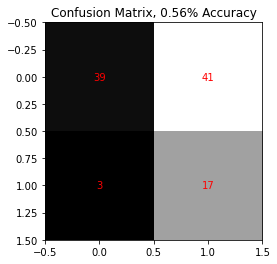

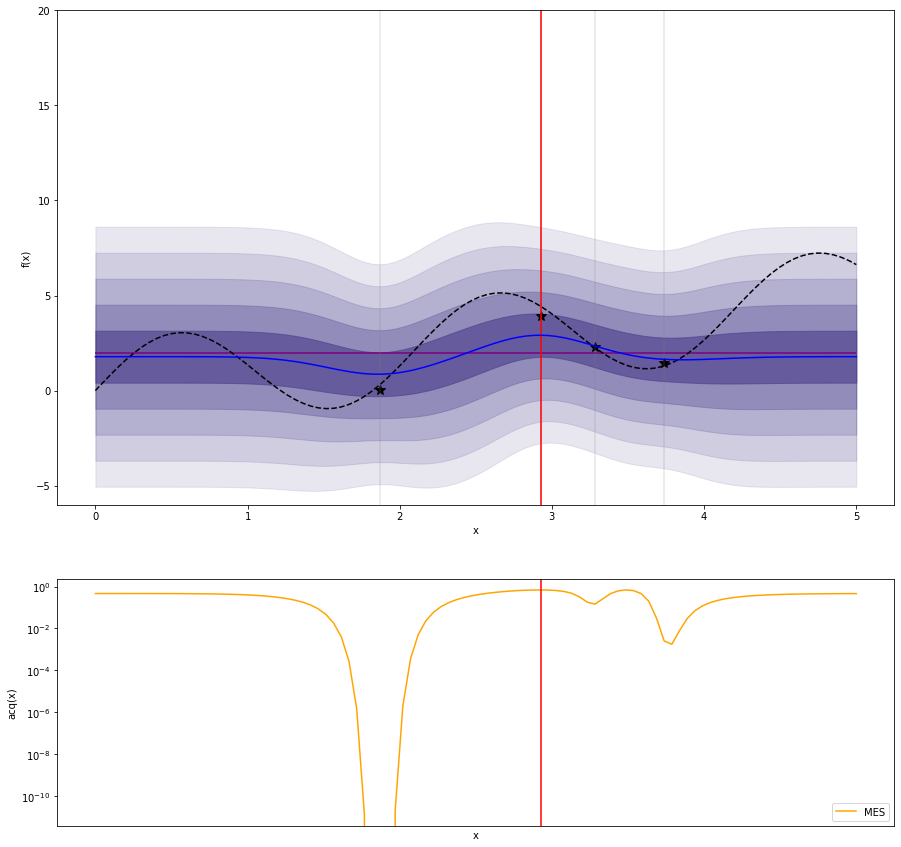

tensor([[3.4343]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.6


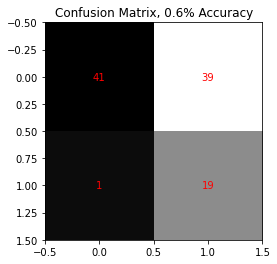

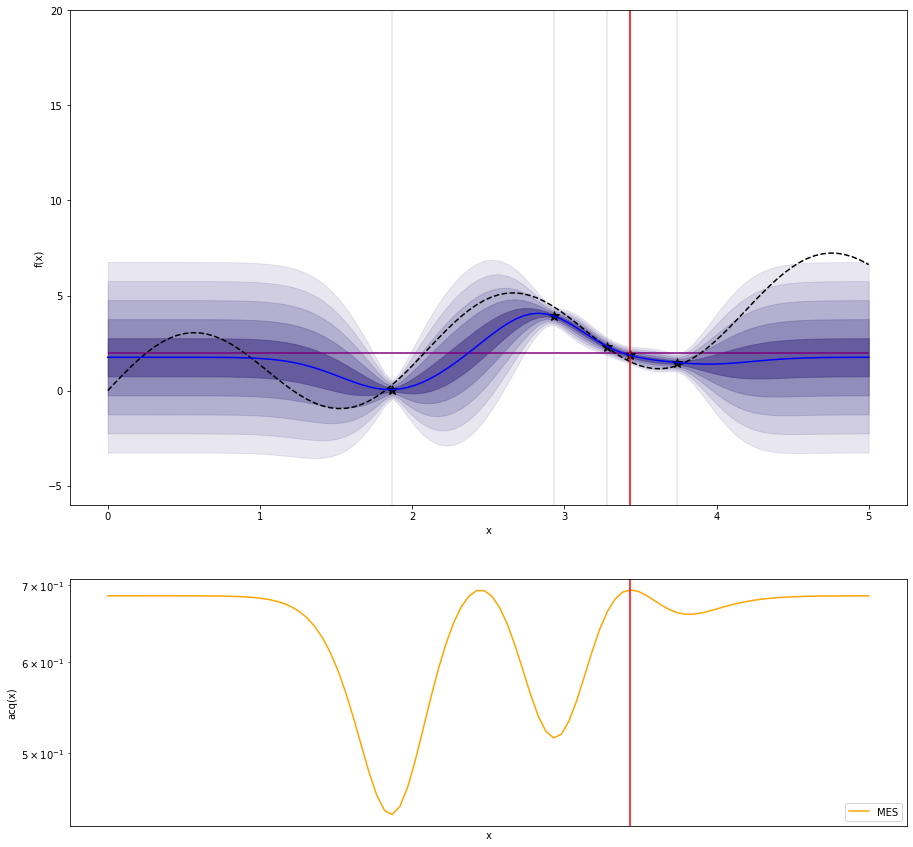

tensor([[2.3737]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.66


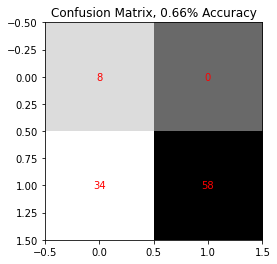

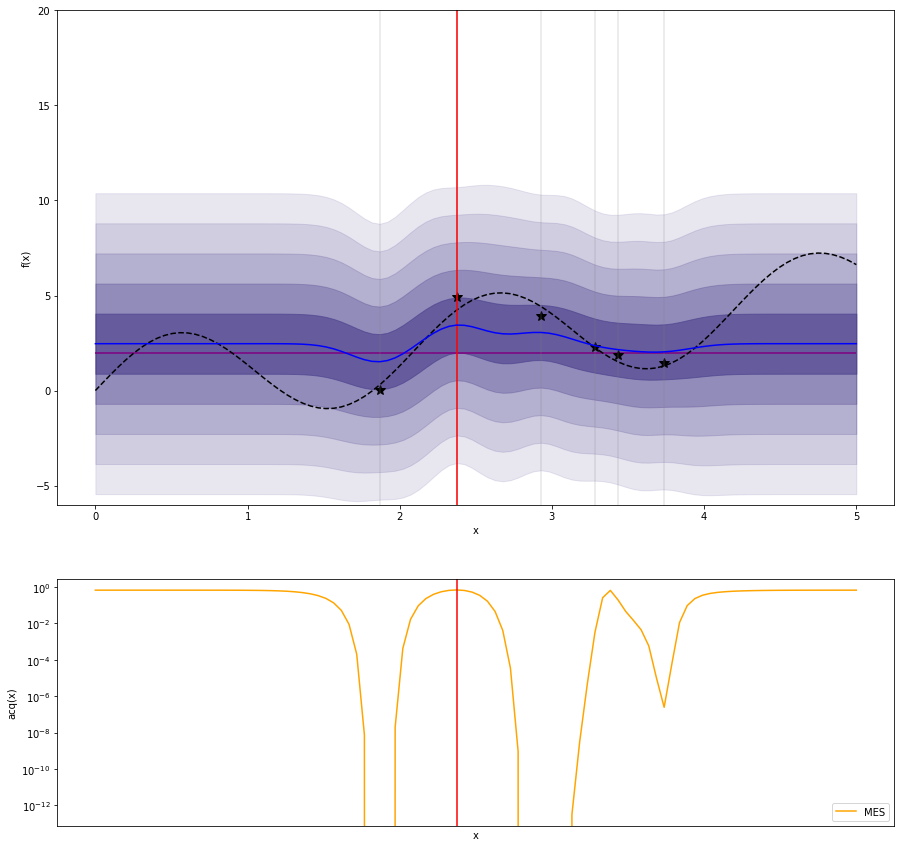

tensor([[3.6869]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.71


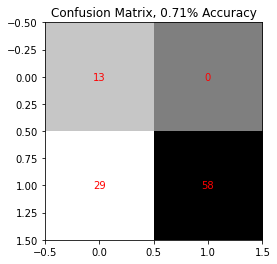

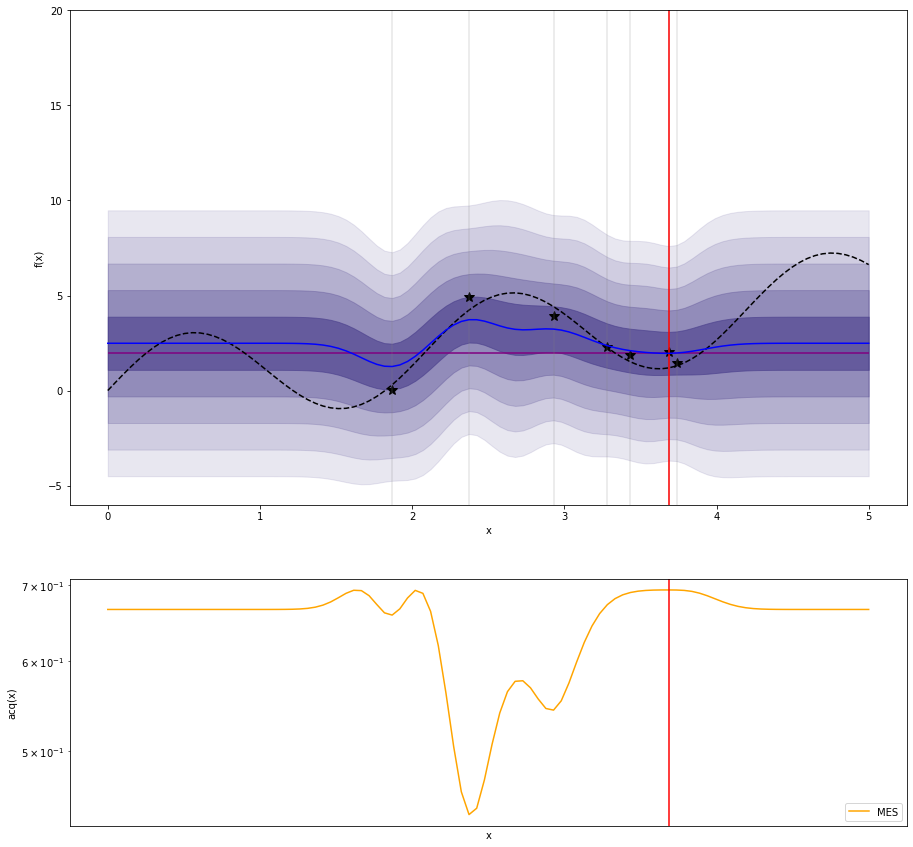

tensor([[3.5354]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.79


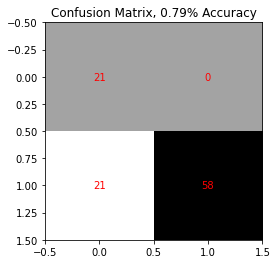

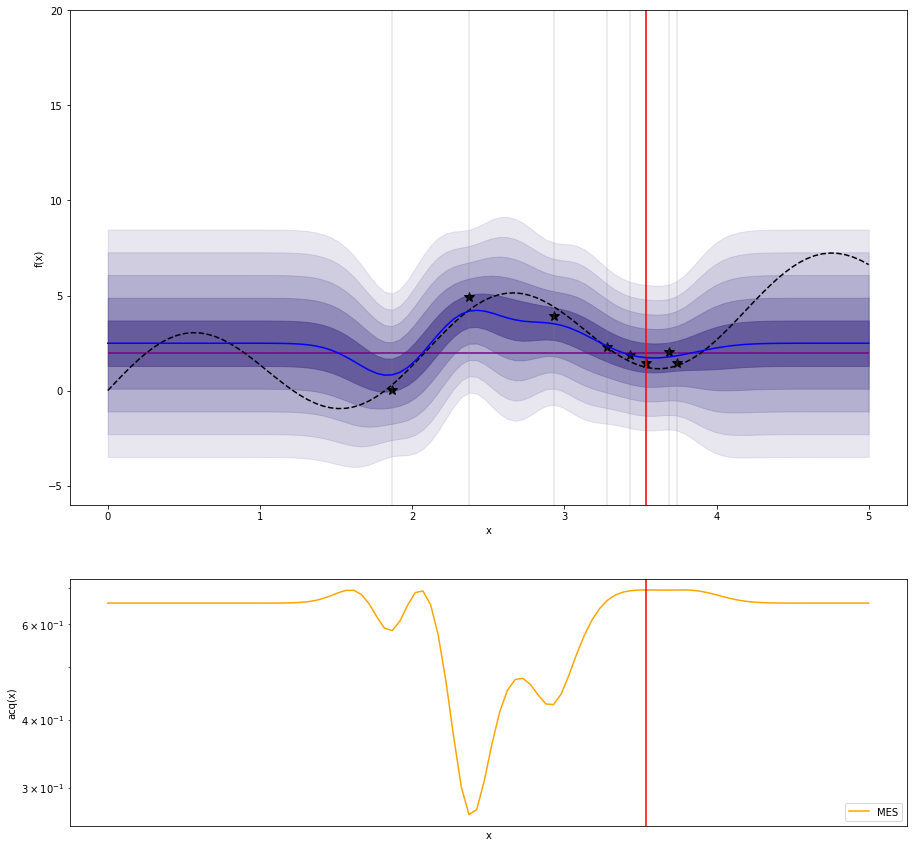

tensor([[2.0707]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.82


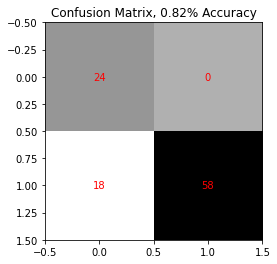

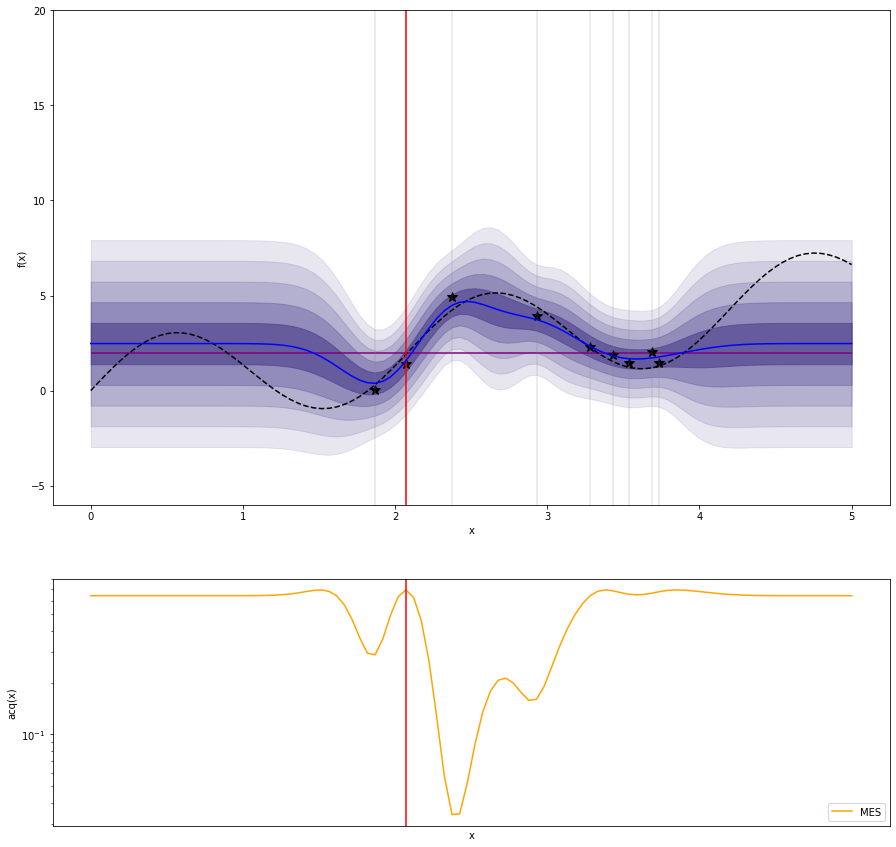

tensor([[3.8889]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.81


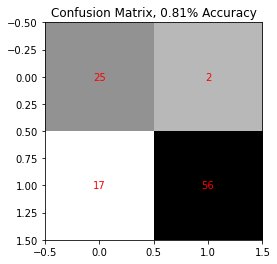

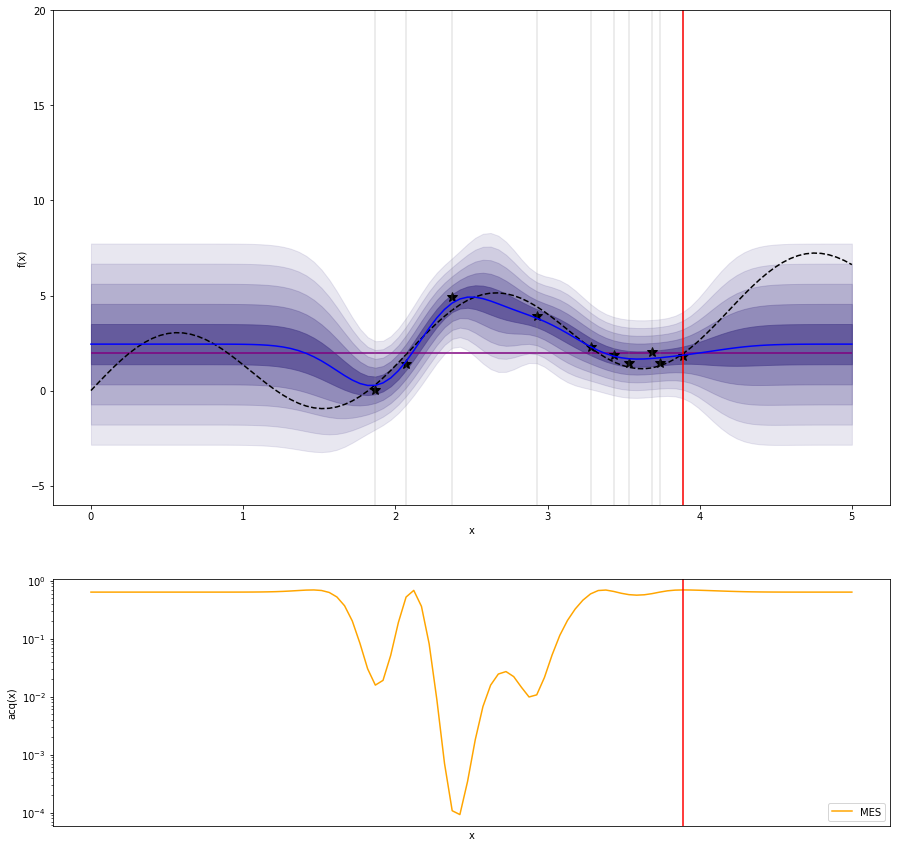

tensor([[4.0404]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8


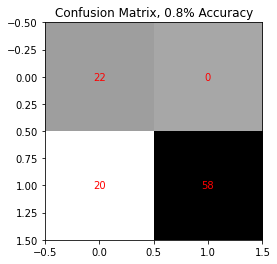

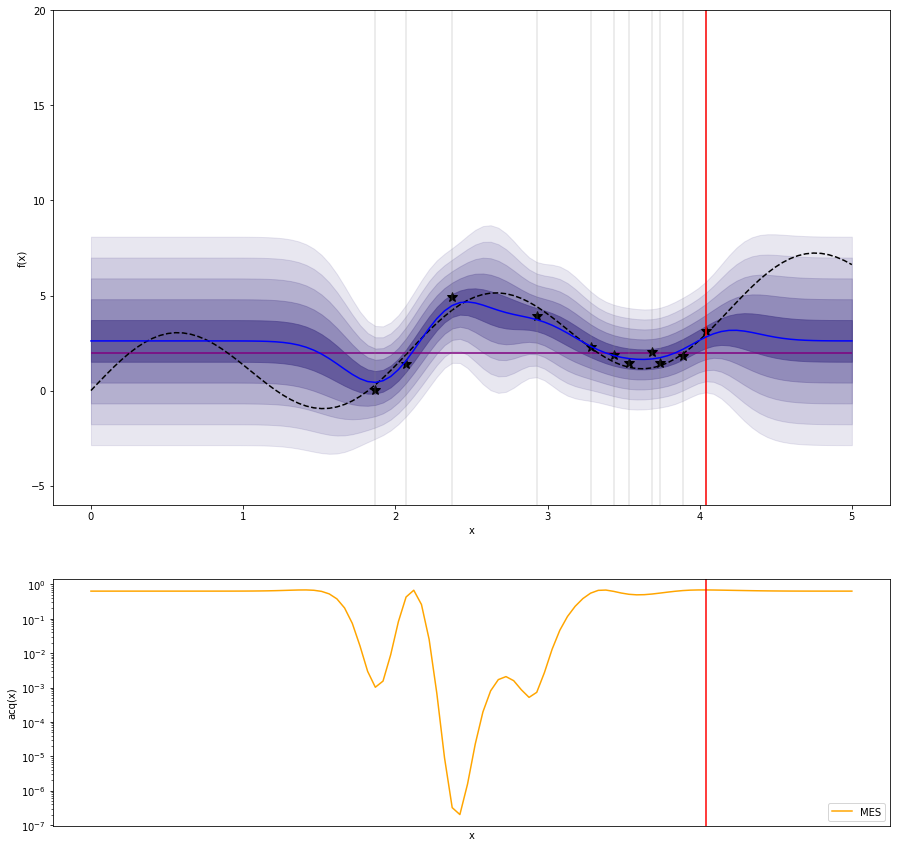

tensor([[3.8384]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8


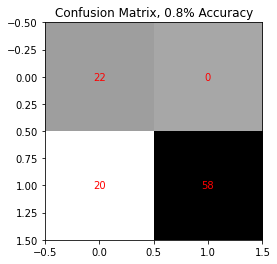

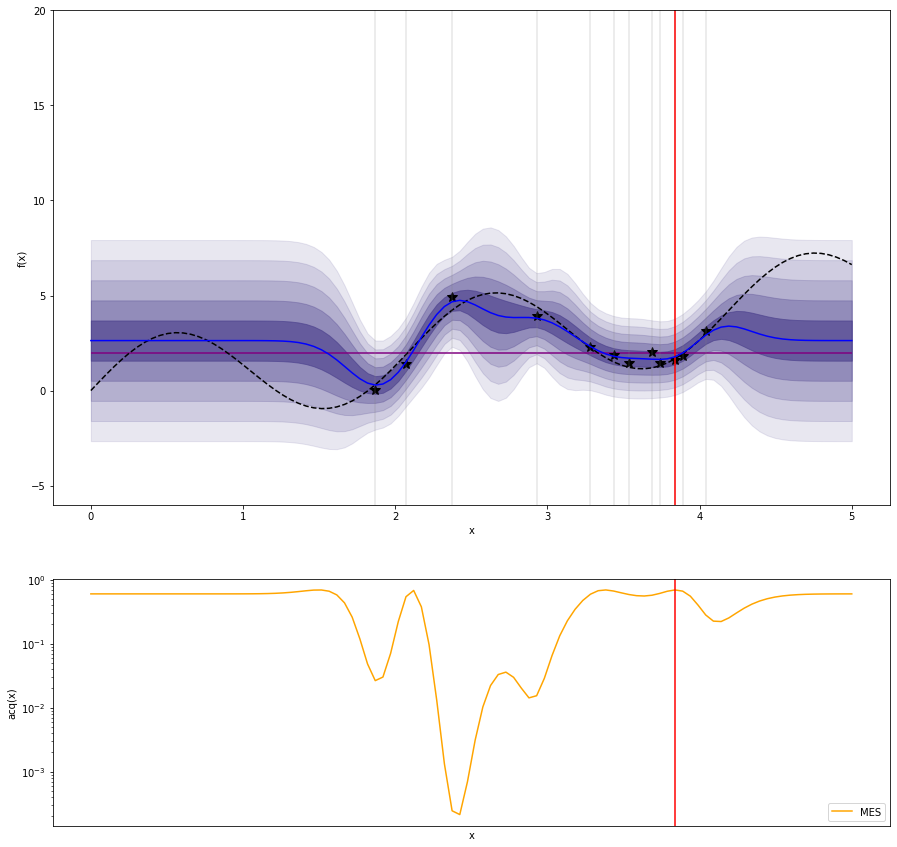

tensor([[1.5657]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.91


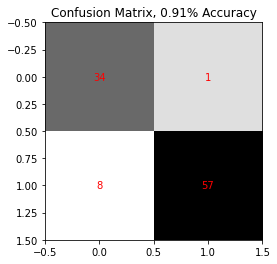

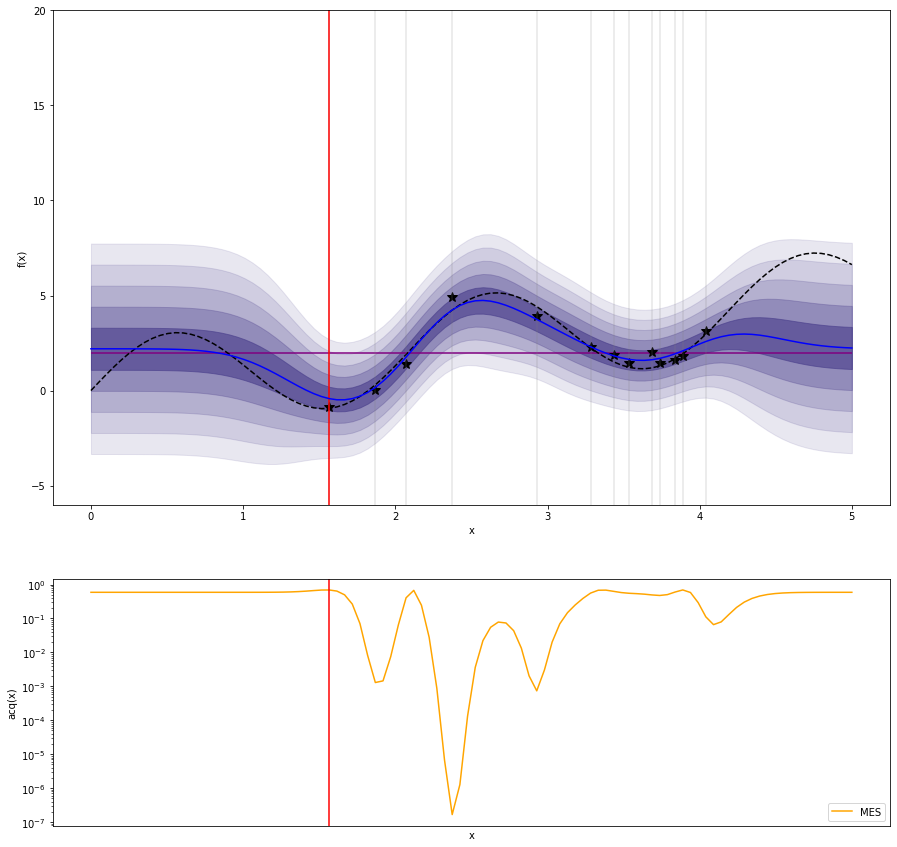

tensor([[0.8081]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.91


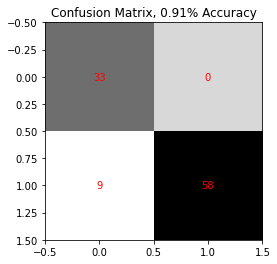

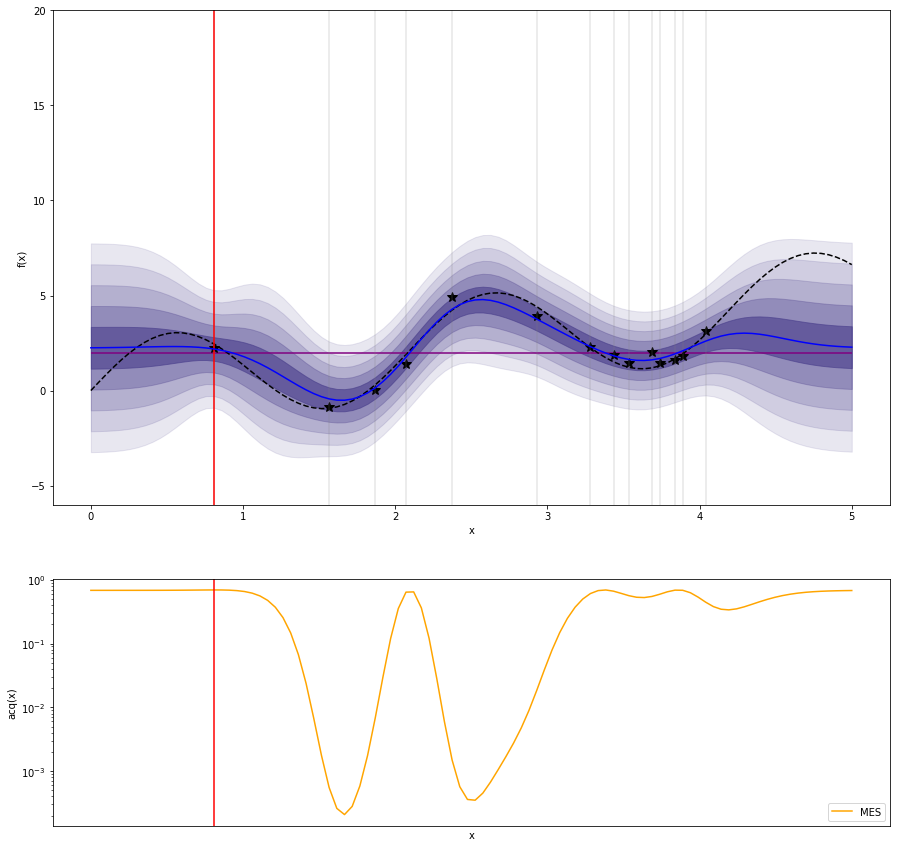

tensor([[0.9091]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.87


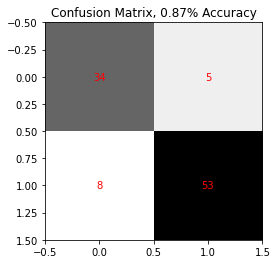

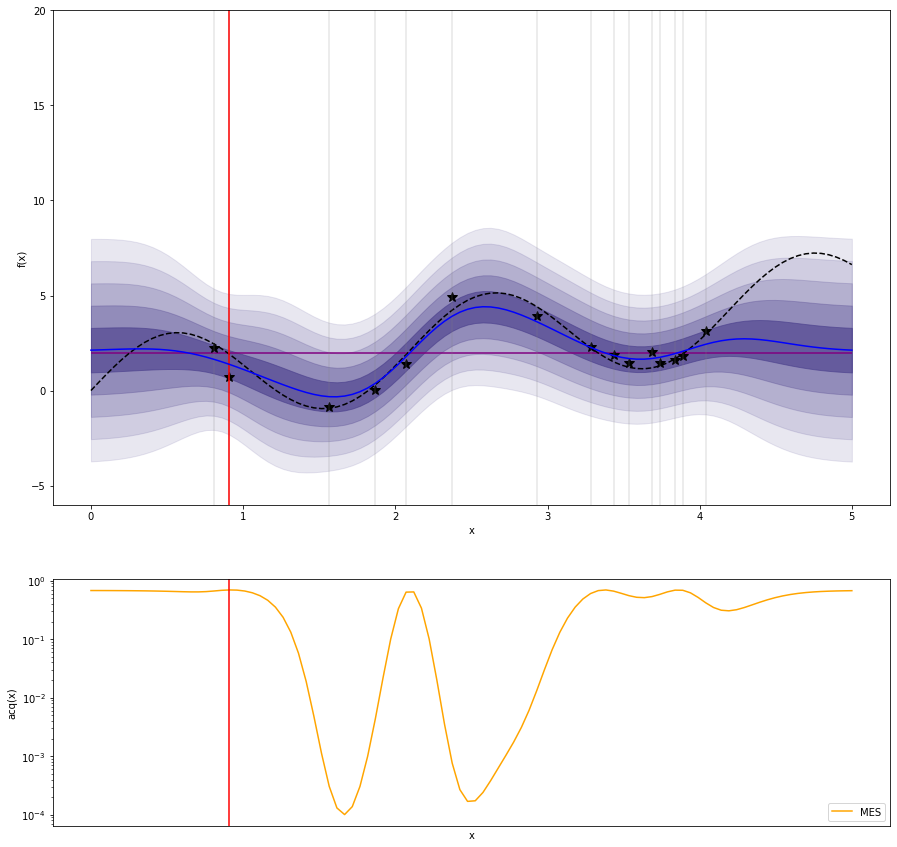

tensor([[0.6061]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9


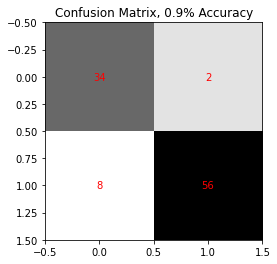

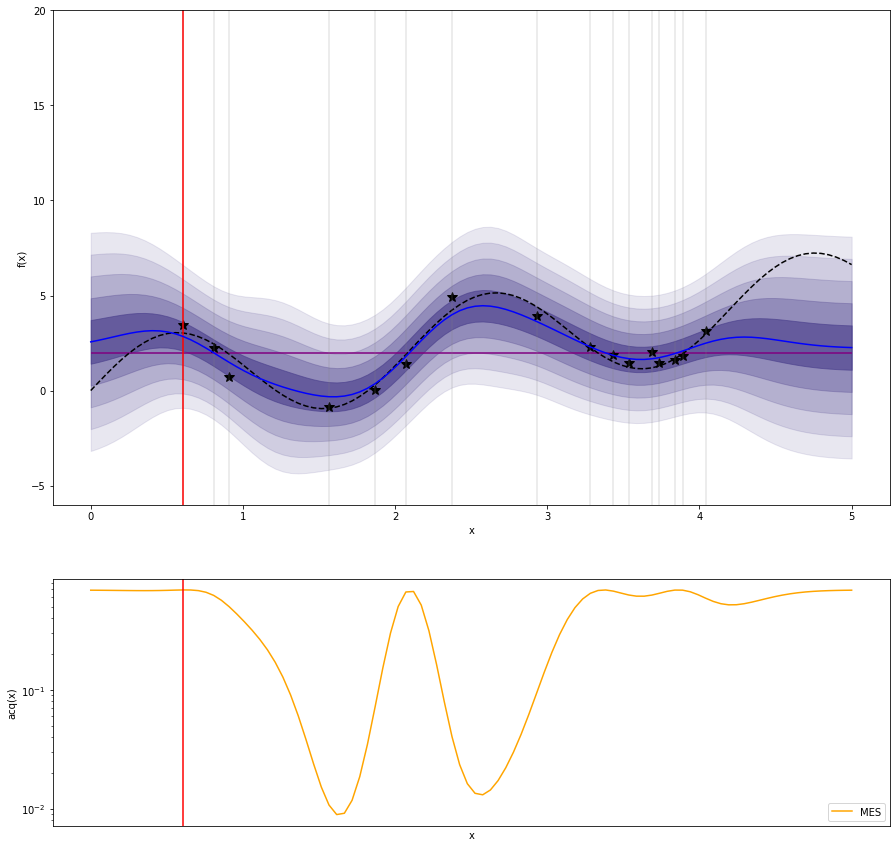

tensor([[3.3838]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.88


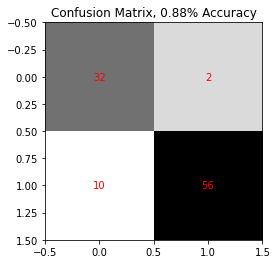

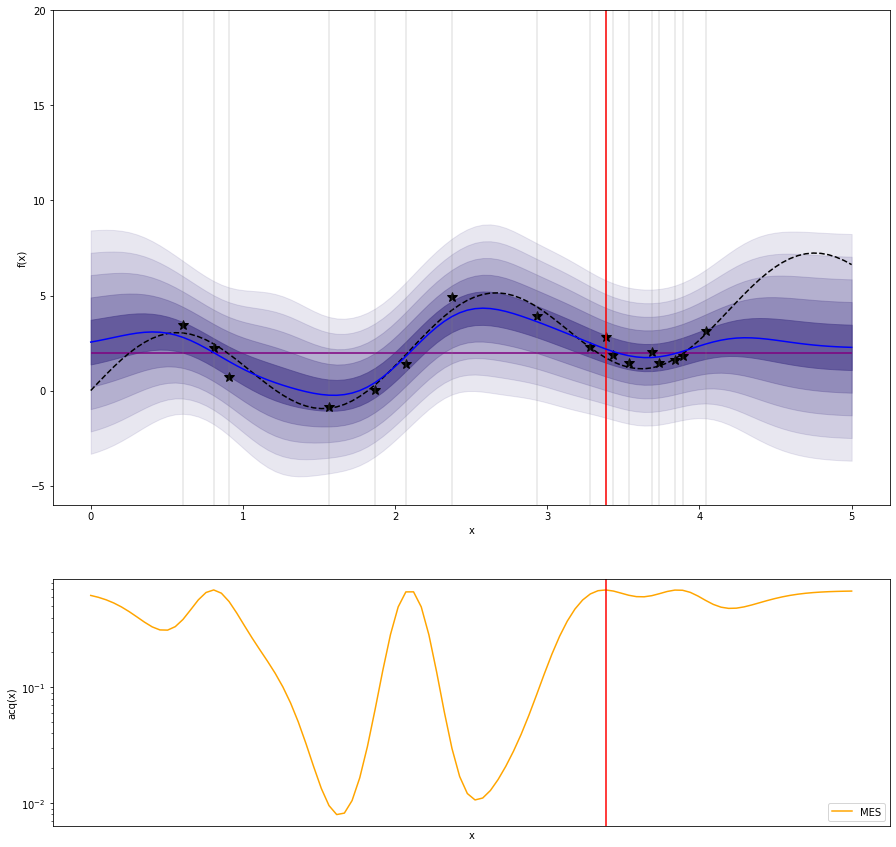

tensor([[3.4848]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9


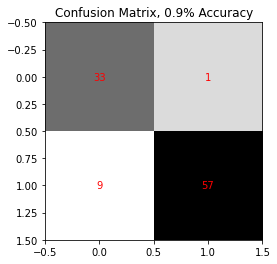

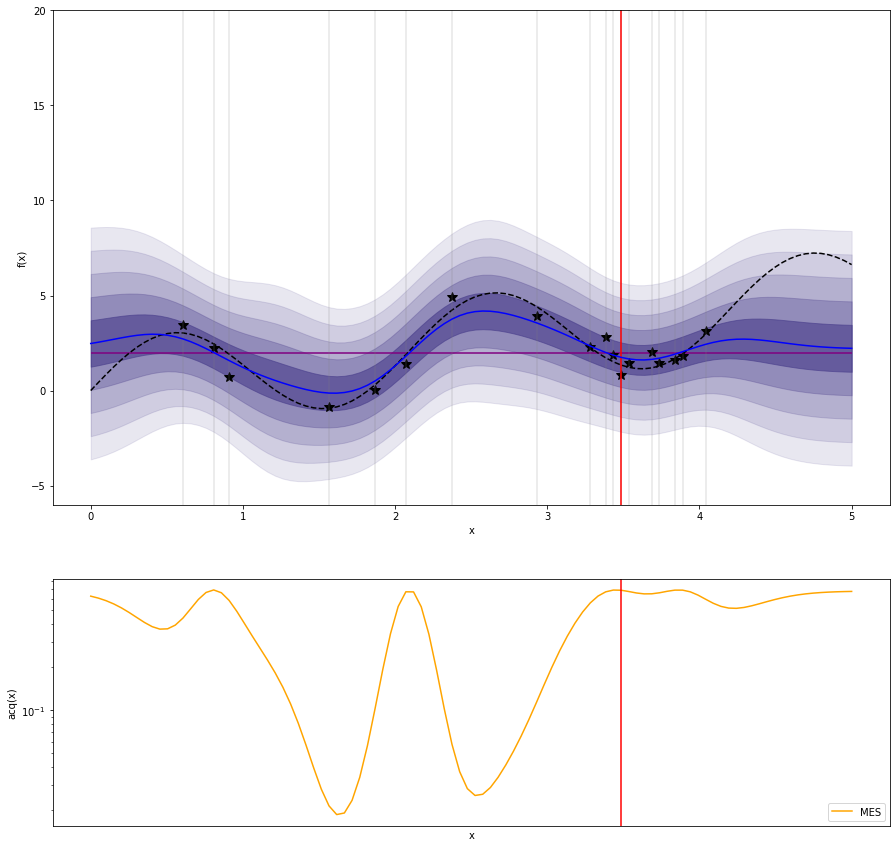

Accuracy % 0.6174895895300416


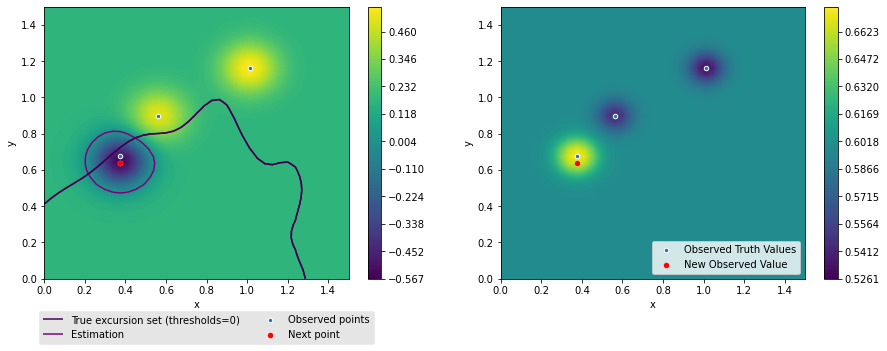

Accuracy % 0.6258179654967282


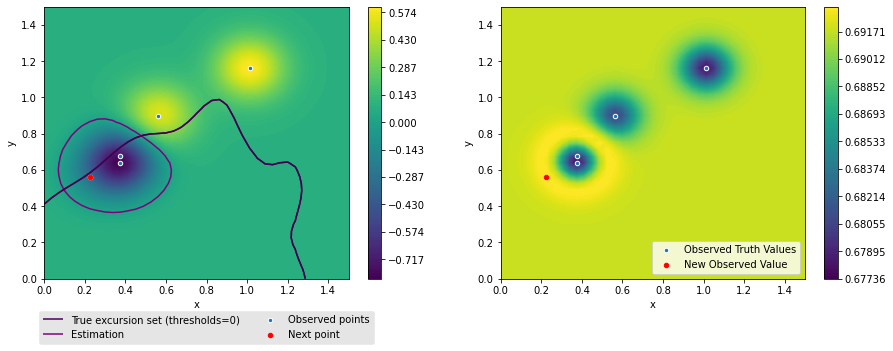

Accuracy % 0.39797739440809043


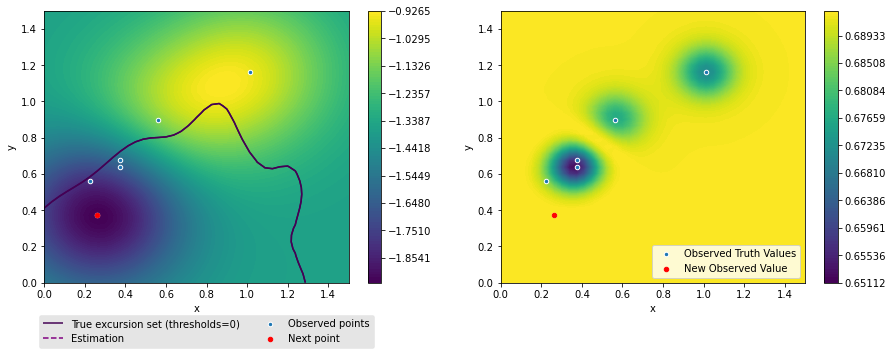

Accuracy % 0.39797739440809043


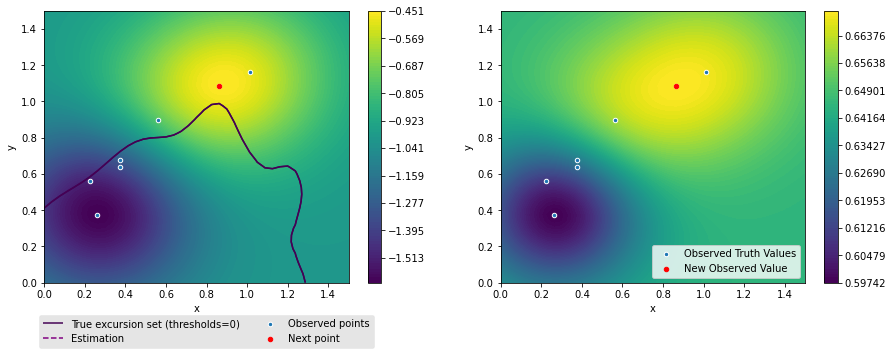

Accuracy % 0.39797739440809043


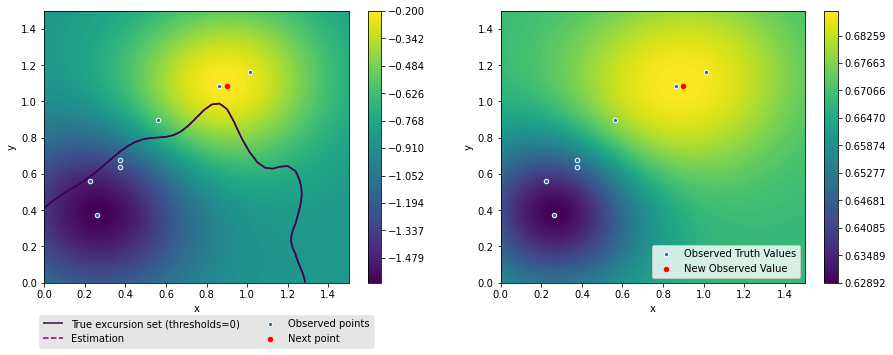

Accuracy % 0.43010113027959546


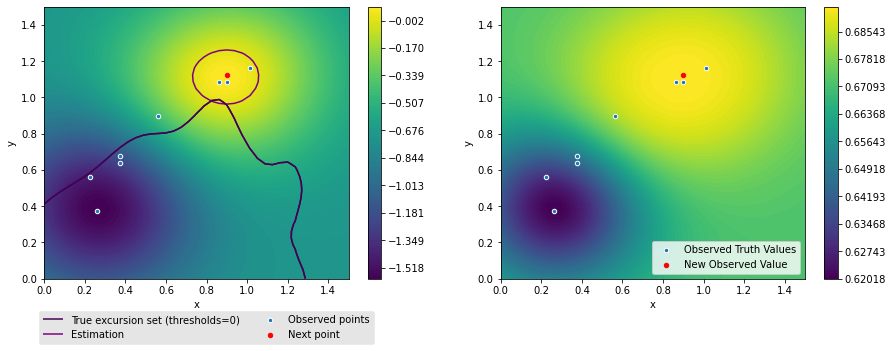

Accuracy % 0.6264128494943486


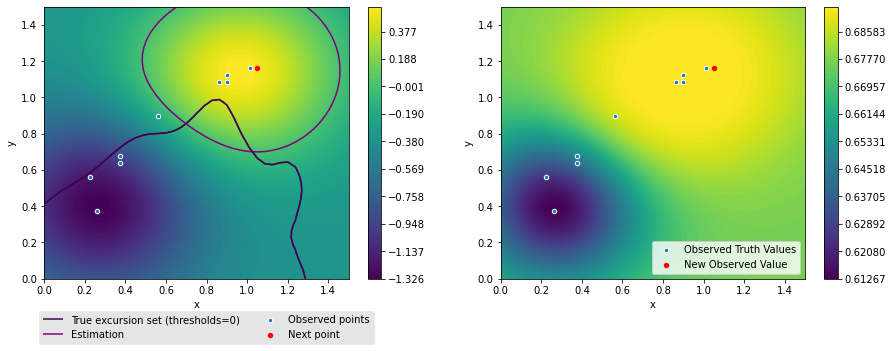

Accuracy % 0.7043426531826293


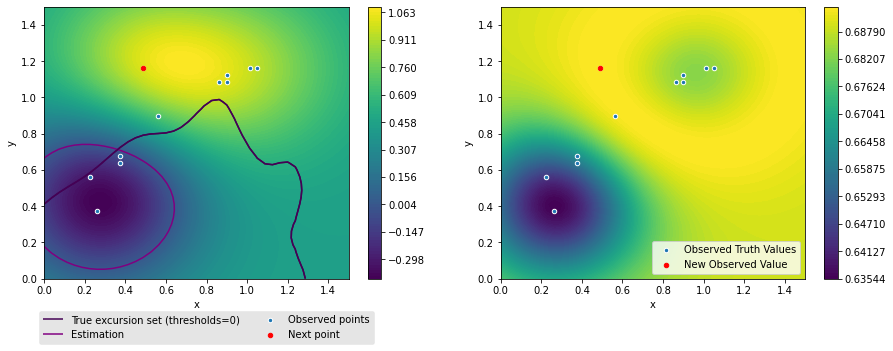

Accuracy % 0.39797739440809043


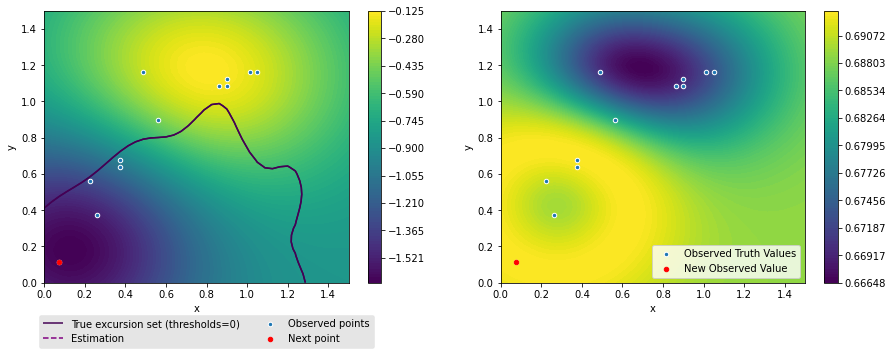

Accuracy % 0.5770374776918501


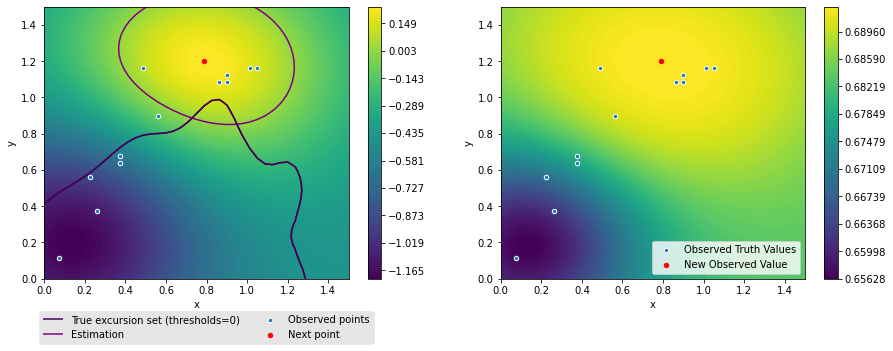

Accuracy % 0.8185603807257584


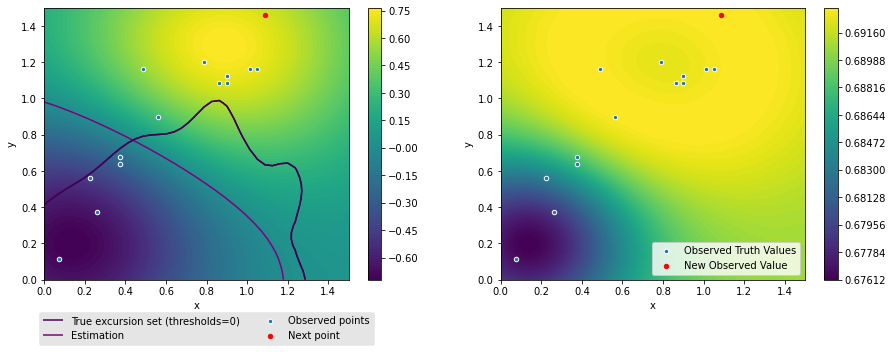

Accuracy % 0.7971445568114218


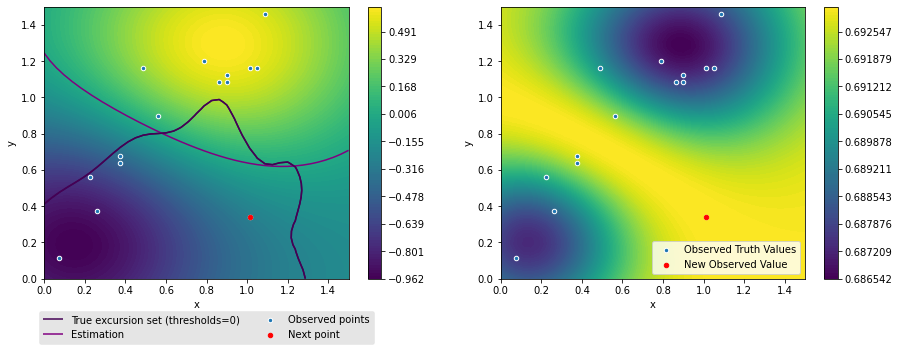

Accuracy % 0.7691850089232599


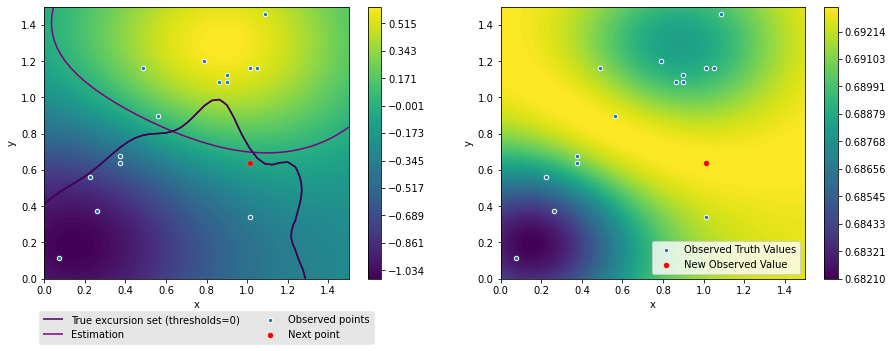

Accuracy % 0.776918500892326


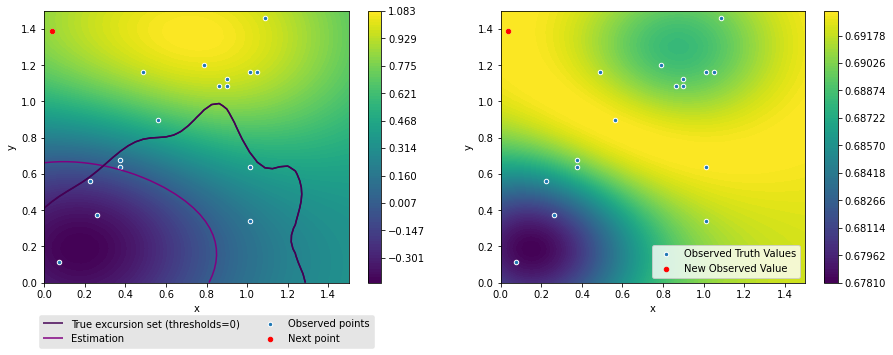

Accuracy % 0.8536585365853658


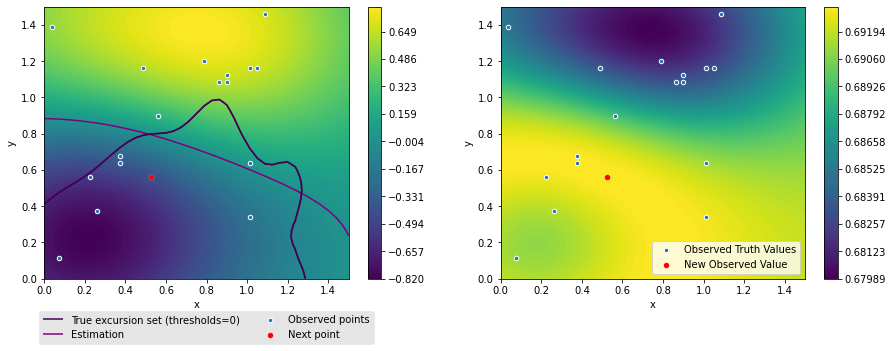

In [5]:
for iteration in range(15):
    x_one = learner_one.suggest()
    print(x_one)
    result_one = learner_one.evaluate_and_tell(x_one)
    plot(result_one, show_confusion_matrix=True)

learner_two.run(15,plot_result=True)

# for iteration in range(15):
#     x_two = learner_two.suggest()
#     print(x_two)
#     result_two = learner_two.evaluate_and_tell(x_two)
#     result_two.plot()

In [6]:
# added prelim support for likelihood
# can now have ONLY gpytorch.likelihoods.gaussian_likelihood objects.
#
# added support for epsilon (noise multiplier) being 0 or greater.  (no check for >0 tho, which it can't be)


Accuracy % 0.8992904920125941
tensor([[0.6375, 0.3000, 0.4125]], device='cuda:0', dtype=torch.float64) tensor([-1.7652], device='cuda:0', dtype=torch.float64)
Accuracy % 0.1253899392057573


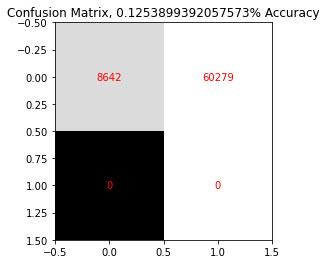

tensor([[1.0500, 0.3375, 0.7875]], device='cuda:0', dtype=torch.float64) tensor([6.2933], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8746100607942426


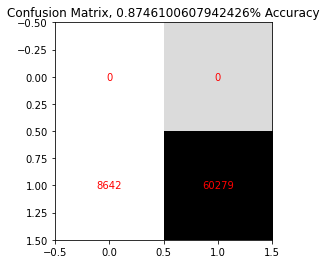

tensor([[0.4875, 0.2250, 0.2625]], device='cuda:0', dtype=torch.float64) tensor([-7.4942], device='cuda:0', dtype=torch.float64)
Accuracy % 0.13128074171877946


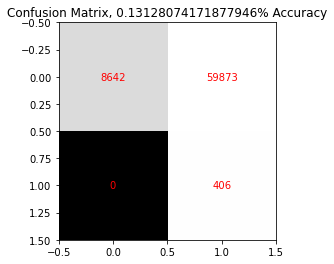

tensor([[1.1250, 0.1875, 0.8250]], device='cuda:0', dtype=torch.float64) tensor([6.4458], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8746100607942426


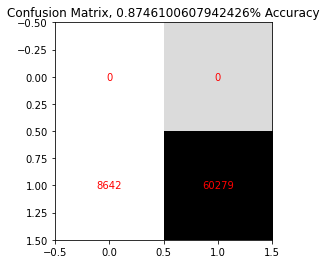

tensor([[0.4500, 0.2250, 0.2625]], device='cuda:0', dtype=torch.float64) tensor([-8.1563], device='cuda:0', dtype=torch.float64)
Accuracy % 0.13863699017715936


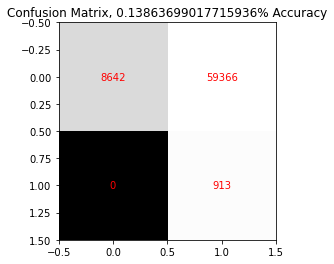

tensor([[1.1625, 0.1125, 0.9375]], device='cuda:0', dtype=torch.float64) tensor([6.7920], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9021488370743315


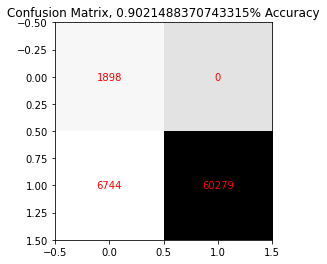

tensor([[0.6000, 0.4875, 0.2625]], device='cuda:0', dtype=torch.float64) tensor([-2.6702], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9382046110764498


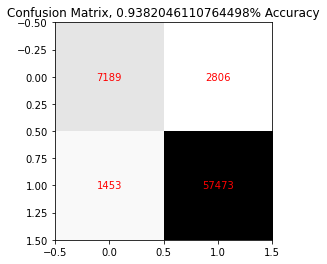

tensor([[0.5625, 0.8625, 0.4125]], device='cuda:0', dtype=torch.float64) tensor([5.0599], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9032515488747986


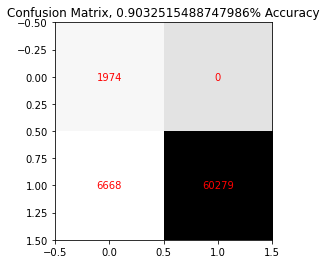

tensor([[0.7500, 0.3375, 0.2250]], device='cuda:0', dtype=torch.float64) tensor([-3.6966], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9518434149243337


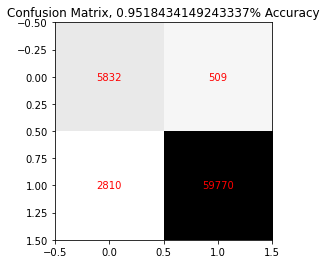

tensor([[0.0750, 0.3750, 0.0000]], device='cuda:0', dtype=torch.float64) tensor([-3.9586], device='cuda:0', dtype=torch.float64)
Accuracy % 0.5184196398775409


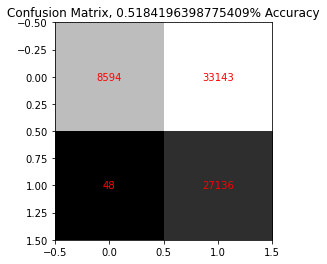

tensor([[0.6000, 1.4250, 0.3375]], device='cuda:0', dtype=torch.float64) tensor([8.9585], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9108399471859085


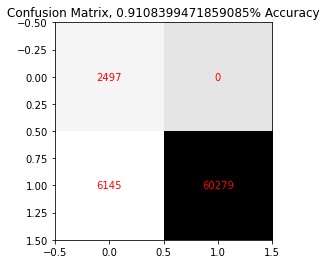

tensor([[0.3000, 0.0750, 0.4500]], device='cuda:0', dtype=torch.float64) tensor([-8.0283], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9276853208746245


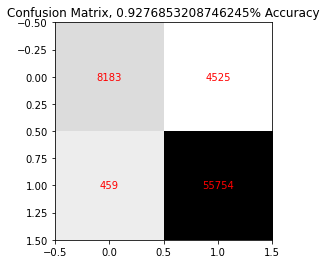

tensor([[0.1500, 0.7500, 0.6750]], device='cuda:0', dtype=torch.float64) tensor([8.7424], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8988842297703168


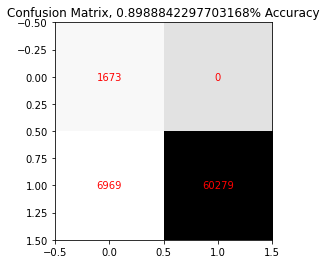

tensor([[0.2250, 0.2625, 0.4125]], device='cuda:0', dtype=torch.float64) tensor([-3.8956], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9438197356393552


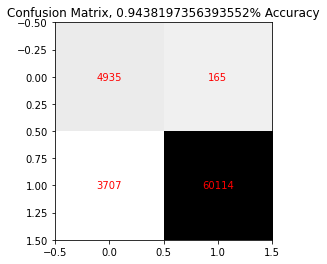

tensor([[0.0375, 0.4125, 0.3375]], device='cuda:0', dtype=torch.float64) tensor([2.3789], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9226795896751353


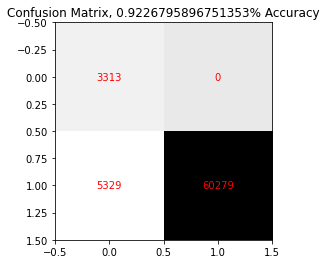

In [7]:
# #
# # If I do not have the function handle properly provided in the problem details I can use basic ask-and-tell.
# #
import excursion_new.test_suite.test_functions.fast_3D as testcase_3D
learner_three = Learner(testcase_3D, algorithm_opts)
learner_three.initialize()

for iteration in range(15):
    x_three = learner_three.suggest()
    new_y = learner_three.details.functions[0](x_three)
    print(x_three, new_y)
    result_three = learner_three.tell(x_three, new_y)
    plot(result_three, show_confusion_matrix=True)





